https://picsum.photos/, https://chatgpt.com/

PREWİTT Operatörü

Gradyan, bir görüntüde yoğunluk değişimlerinin yönünü ve büyüklüğünü belirleyen matematiksel bir kavramdır. Kenar tespiti ve görüntü işleme uygulamalarında sıkça kullanılır.



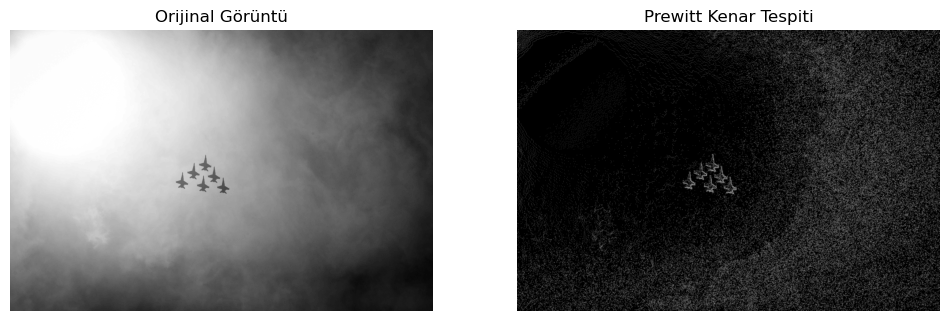

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_filter(image):
    # Prewitt filtrelerinin tanımlanması
    prewitt_x = np.array([[-1, 0, 1],     
                          [-1, 0, 1],
                          [-1, 0, 1]], dtype=np.float32)

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]], dtype=np.float32)
#prewitt_x yatay kenarları tespit ederken, prewitt_y dikey kenarları tespit eder.
    
    # Yatay ve dikey kenar tespitini uygula
    grad_x = cv2.filter2D(image, -1, prewitt_x)
    grad_y = cv2.filter2D(image, -1, prewitt_y)
#cv2.filter2D() fonksiyonu bir konvolüsyon işlemi yapar. 
#OpenCV'de kullanılan bu fonksiyon, bir görüntü üzerine verilen çekirdek (kernel) filtresini kaydırarak (sliding window) konvolüsyon uygular.


#Bu fonksiyon, görüntüye belirli bir çekirdek (kernel) uygulayarak filtreleme yapar. 
#grad_x ve grad_y, yatay ve dikey kenar tespit sonuçlarını içerir.
#-1 değeri, çıktı görüntüsünün aynı derinlikte (bit derinliği) olacağını belirtir.
    # Gradienlerin büyüklüğünü hesapla
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
#np.sqrt: Bu işlem, her iki gradientin karelerinin toplamının karekökünü alarak kenarların büyüklüğünü hesaplar.
    
    # Görüntüyü normalize et
    min_val, max_val = np.min(gradient_magnitude), np.max(gradient_magnitude)
    if max_val > min_val:
        gradient_magnitude = (gradient_magnitude - min_val) * (255 / (max_val - min_val))
    else:
        gradient_magnitude = np.zeros_like(gradient_magnitude)
    
    return gradient_magnitude.astype(np.uint8)
#np.min ve np.max: Görüntüdeki minimum ve maksimum değerleri hesaplar.
#Normalize Etme: Görüntünün değerlerini 0 ile 255 aralığına çeker.
#Aksi durumda sıfırlarla dolu bir matris döndürür.


def process_and_display(image_path):
    # Görüntüyü oku
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Görüntü okuma kontrolü
    if original_image is None:
        print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
        return
    
    # Prewitt filtresi ile kenar tespitini uygula
    prewitt_image = prewitt_filter(original_image)
    
    # Görüntüleri yan yana göster
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Orijinal Görüntü')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Prewitt Kenar Tespiti')
    plt.imshow(prewitt_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Örnek kullanım
process_and_display('imagev5.jpg')


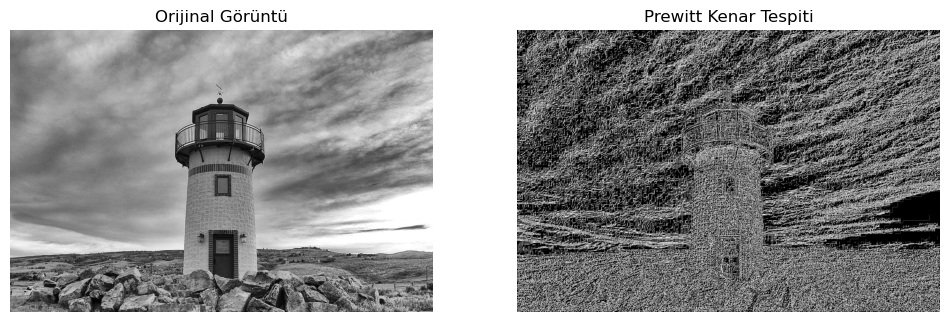

In [46]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def prewitt_filter(image):
    # Prewitt filtrelerinin tanımlanması
    prewitt_x = np.array([[-1, 0, 1],     
                          [-1, 0, 1],
                          [-1, 0, 1]], dtype=np.float32)

    prewitt_y = np.array([[-1, -1, -1],
                          [ 0,  0,  0],
                          [ 1,  1,  1]], dtype=np.float32)
#prewitt_x yatay kenarları tespit ederken, prewitt_y dikey kenarları tespit eder.
    
    # Yatay ve dikey kenar tespitini uygula
    grad_x = cv2.filter2D(image, -1, prewitt_x)
    grad_y = cv2.filter2D(image, -1, prewitt_y)
#Bu fonksiyon, görüntüye belirli bir çekirdek (kernel) uygulayarak filtreleme yapar. 
#grad_x ve grad_y, yatay ve dikey kenar tespit sonuçlarını içerir.
    
    # Gradienlerin büyüklüğünü hesapla
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
#np.sqrt: Bu işlem, her iki gradientin karelerinin toplamının karekökünü alarak kenarların büyüklüğünü hesaplar.
    
    # Görüntüyü normalize et
    min_val, max_val = np.min(gradient_magnitude), np.max(gradient_magnitude)
    if max_val > min_val:
        gradient_magnitude = (gradient_magnitude - min_val) * (255 / (max_val - min_val))
    else:
        gradient_magnitude = np.zeros_like(gradient_magnitude)
    
    return gradient_magnitude.astype(np.uint8)
#np.min ve np.max: Görüntüdeki minimum ve maksimum değerleri hesaplar.
#Normalize Etme: Görüntünün değerlerini 0 ile 255 aralığına çeker.
#Eğer maksimum ve minimum değerler eşitse, sıfırlarla dolu bir matris döndürür.


def process_and_display(image_path):
    # Görüntüyü oku
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Görüntü okuma kontrolü
    if original_image is None:
        print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
        return
    
    # Prewitt filtresi ile kenar tespitini uygula
    prewitt_image = prewitt_filter(original_image)
    
    # Görüntüleri yan yana göster
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Orijinal Görüntü')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Prewitt Kenar Tespiti')
    plt.imshow(prewitt_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Örnek kullanım
process_and_display('imagev6.jpg')


In [17]:
new_original_image = cv2.imread('imagev5.jpg')

# Görüntü boyutlarını ve kanal sayılarını kontrol et
height, width, channels = new_original_image.shape
print(f"Yükseklik: {height}, Genişlik: {width}, Kanallar: {channels}")

# Renk uzayı varsayılan olarak BGR'dir
print("Varsayılan renk uzayı: BGR")
#Görüntü Renk Uzayını Belirleyin: Görüntüyü okuduktan sonra, genellikle BGR renk uzayında olduğunu bilirsiniz 
#çünkü OpenCV varsayılan olarak BGR renk uzayını kullanır.
#Eğer renk uzayını kontrol etmek istiyorsanız, görüntüdeki renk kanallarının değerlerine bakabilirsiniz.


Yükseklik: 2848, Genişlik: 4288, Kanallar: 3
Varsayılan renk uzayı: BGR


In [18]:
# BGR'den RGB'ye dönüştürme
rgb_image = cv2.cvtColor(new_original_image, cv2.COLOR_BGR2RGB)

(-0.5, 4287.5, 2847.5, -0.5)

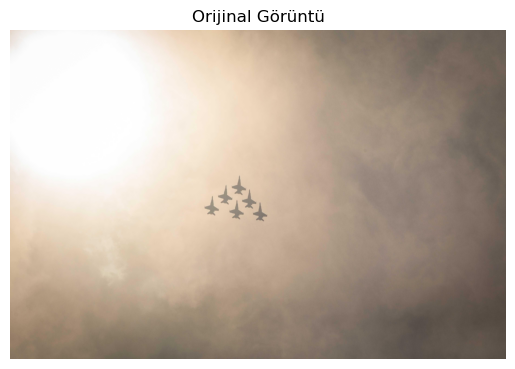

In [19]:
plt.subplot(1, 1, 1)
plt.title('Orijinal Görüntü')
plt.imshow(rgb_image)
plt.axis('off')

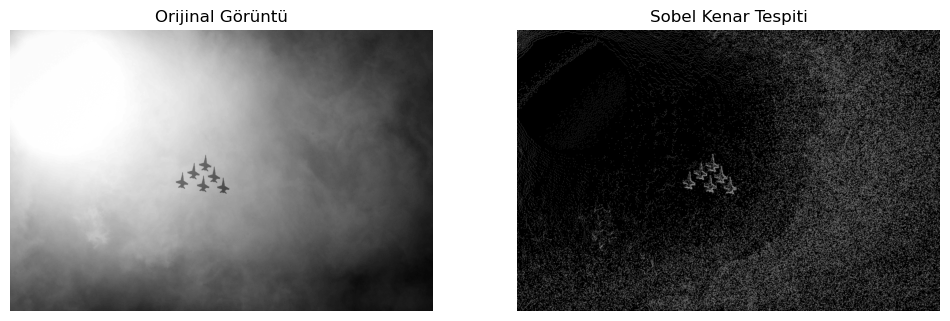

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_filter(image):
    # Sobel filtrelerinin tanımlanması
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)
    # Sobel filtrelerini uygula
    grad_x = cv2.filter2D(image, -1, sobel_x)
    grad_y = cv2.filter2D(image, -1, sobel_y)
    
    # Gradienlerin büyüklüğünü hesapla
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Görüntüyü normalize et
    min_val, max_val = np.min(gradient_magnitude), np.max(gradient_magnitude)
    if max_val > min_val:
        gradient_magnitude = (gradient_magnitude - min_val) * (255 / (max_val - min_val))
    else:
        gradient_magnitude = np.zeros_like(gradient_magnitude)
    
    return gradient_magnitude.astype(np.uint8)

def process_and_display(image_path):
    # Görüntüyü oku
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Görüntü okuma kontrolü
    if original_image is None:
        print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
        return
    
    # Sobel filtresi ile kenar tespitini uygula
    sobel_image = sobel_filter(original_image)
    
    # Görüntüleri yan yana göster
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Orijinal Görüntü')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Sobel Kenar Tespiti')
    plt.imshow(sobel_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Örnek kullanım
process_and_display('imagev5.jpg')


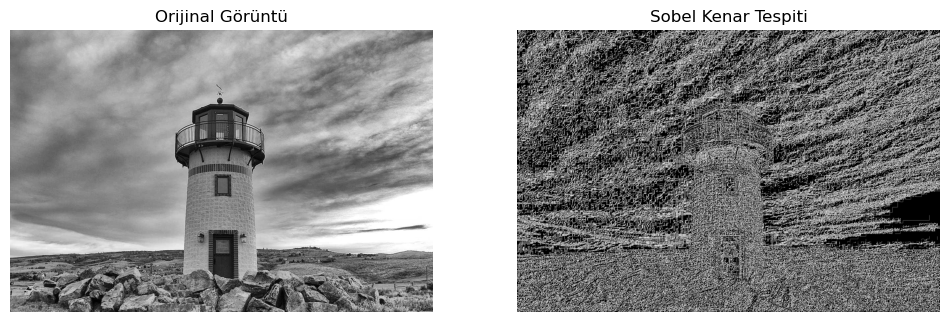

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def sobel_filter(image):
    # Sobel filtrelerinin tanımlanması
    sobel_x = np.array([[-1, 0, 1],
                        [-2, 0, 2],
                        [-1, 0, 1]], dtype=np.float32)

    sobel_y = np.array([[-1, -2, -1],
                        [ 0,  0,  0],
                        [ 1,  2,  1]], dtype=np.float32)
    # Sobel filtrelerini uygula
    grad_x = cv2.filter2D(image, -1, sobel_x)
    grad_y = cv2.filter2D(image, -1, sobel_y)
    
    # Gradienlerin büyüklüğünü hesapla
    gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
    
    # Görüntüyü normalize et
    min_val, max_val = np.min(gradient_magnitude), np.max(gradient_magnitude)
    if max_val > min_val:
        gradient_magnitude = (gradient_magnitude - min_val) * (255 / (max_val - min_val))
    else:
        gradient_magnitude = np.zeros_like(gradient_magnitude)
    
    return gradient_magnitude.astype(np.uint8)

def process_and_display(image_path):
    # Görüntüyü oku
    original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Görüntü okuma kontrolü
    if original_image is None:
        print("Görüntü yüklenemedi. Lütfen dosya yolunu kontrol edin.")
        return
    
    # Sobel filtresi ile kenar tespitini uygula
    sobel_image = sobel_filter(original_image)
    
    # Görüntüleri yan yana göster
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1)
    plt.title('Orijinal Görüntü')
    plt.imshow(original_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Sobel Kenar Tespiti')
    plt.imshow(sobel_image, cmap='gray')
    plt.axis('off')
    
    plt.show()

# Örnek kullanım
process_and_display('imagev6.jpg')
